In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data Processing Libraries (Feature Importance)
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier,ExtraTreesRegressor
from yellowbrick.regressor import ResidualsPlot

# Outlier Removal Methods
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN

# Automated Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Splitting Into Train and Test Set
from sklearn.model_selection import train_test_split

# Scaling Solutions
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Machine Learning Models for MLP Regressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
sns.set(rc={'figure.figsize':(11.7,8.27)})
from xgboost import XGBRegressor
import xgboost
#忽略警告
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

In [2]:

#数据导入
df= pd.read_csv(r'D:\大学\应用回归分析\实用回归大作业\boston_house.csv')
df.info()
print("Shape of dataset:", df.shape)
sta_total=df.describe()#查看数据基本统计量
sta_total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
Shape of dataset: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:

#将CHAS和RAD转换成category型
def convert_Categorical(df, max_category = 10):
    for col in df.columns:
        num_category = df[col].nunique()
        if num_category < max_category:
            df[col] = df[col].astype('category')
convert_Categorical(df)


In [4]:
#分离出定性和定量变量
category_columns = df.select_dtypes(include='category').columns.tolist()
sta_cate=df[category_columns].describe()
numeric_columns = df.drop(columns=category_columns).columns.tolist()


<Axes: xlabel='MEDV', ylabel='密度'>

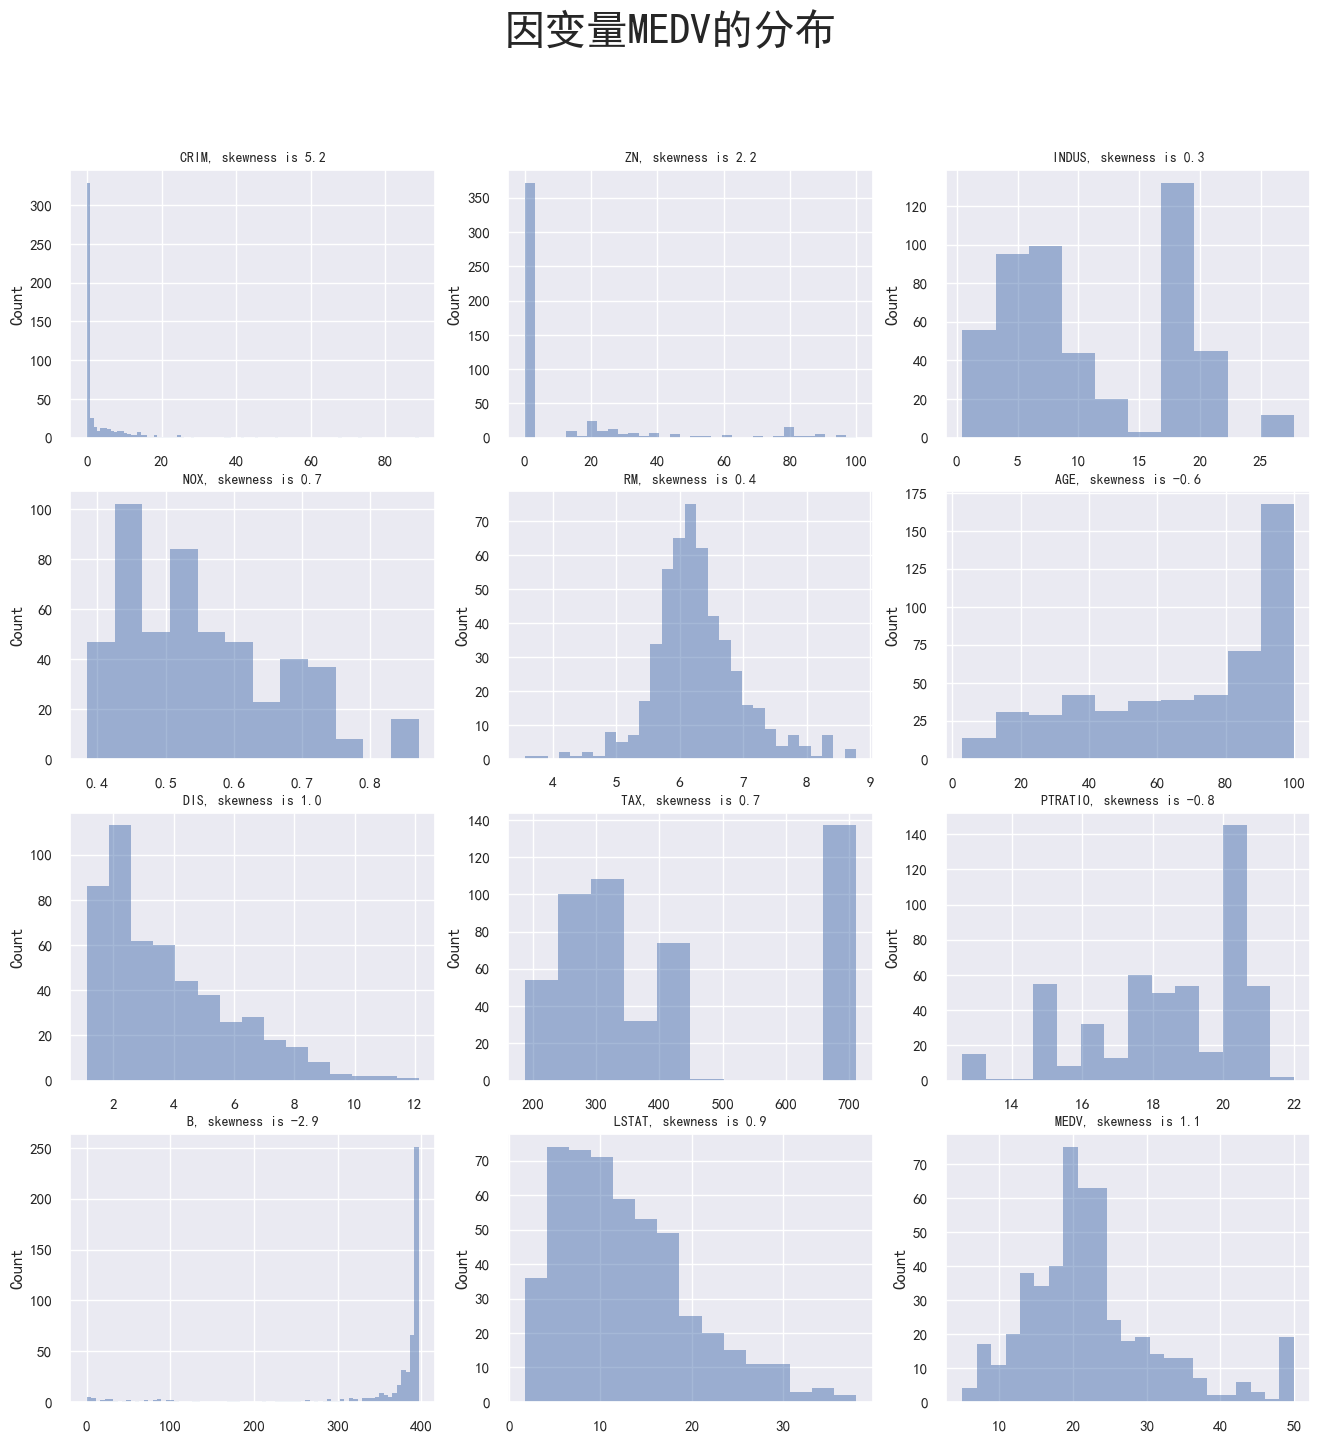

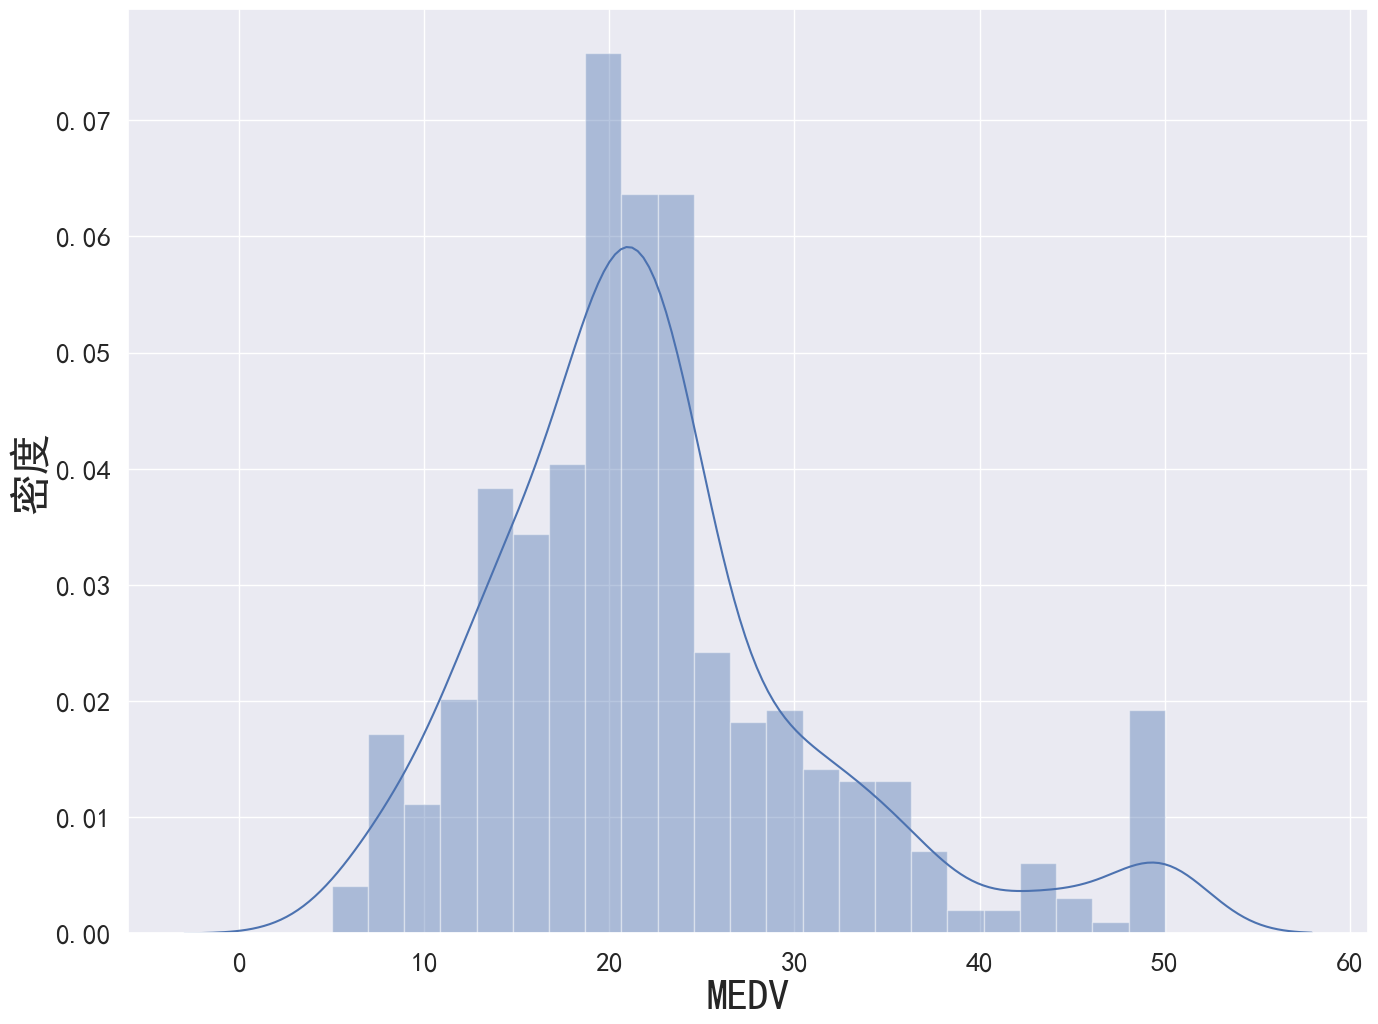

In [5]:
#所有数值变量的直方图
fig, axs = plt.subplots(4,3,figsize=(16,16),)
fig.suptitle('distibution for each numeric variable', size=15)
axs = axs.flatten()
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], ax=axs[i], fill=True,alpha=.5, linewidth=0) 
    axs[i].set_xlabel('')
    axs[i].set_title(col + ', skewness is '+str(round(df[col].skew(axis = 0, skipna = True),1)),size= 10)
plt.figure(figsize=(16, 12))
fig.suptitle('因变量MEDV的分布', size=30)
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel('MEDV', fontsize=30)
plt.ylabel('密度', fontsize=30)
sns.distplot(df['MEDV'])


(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

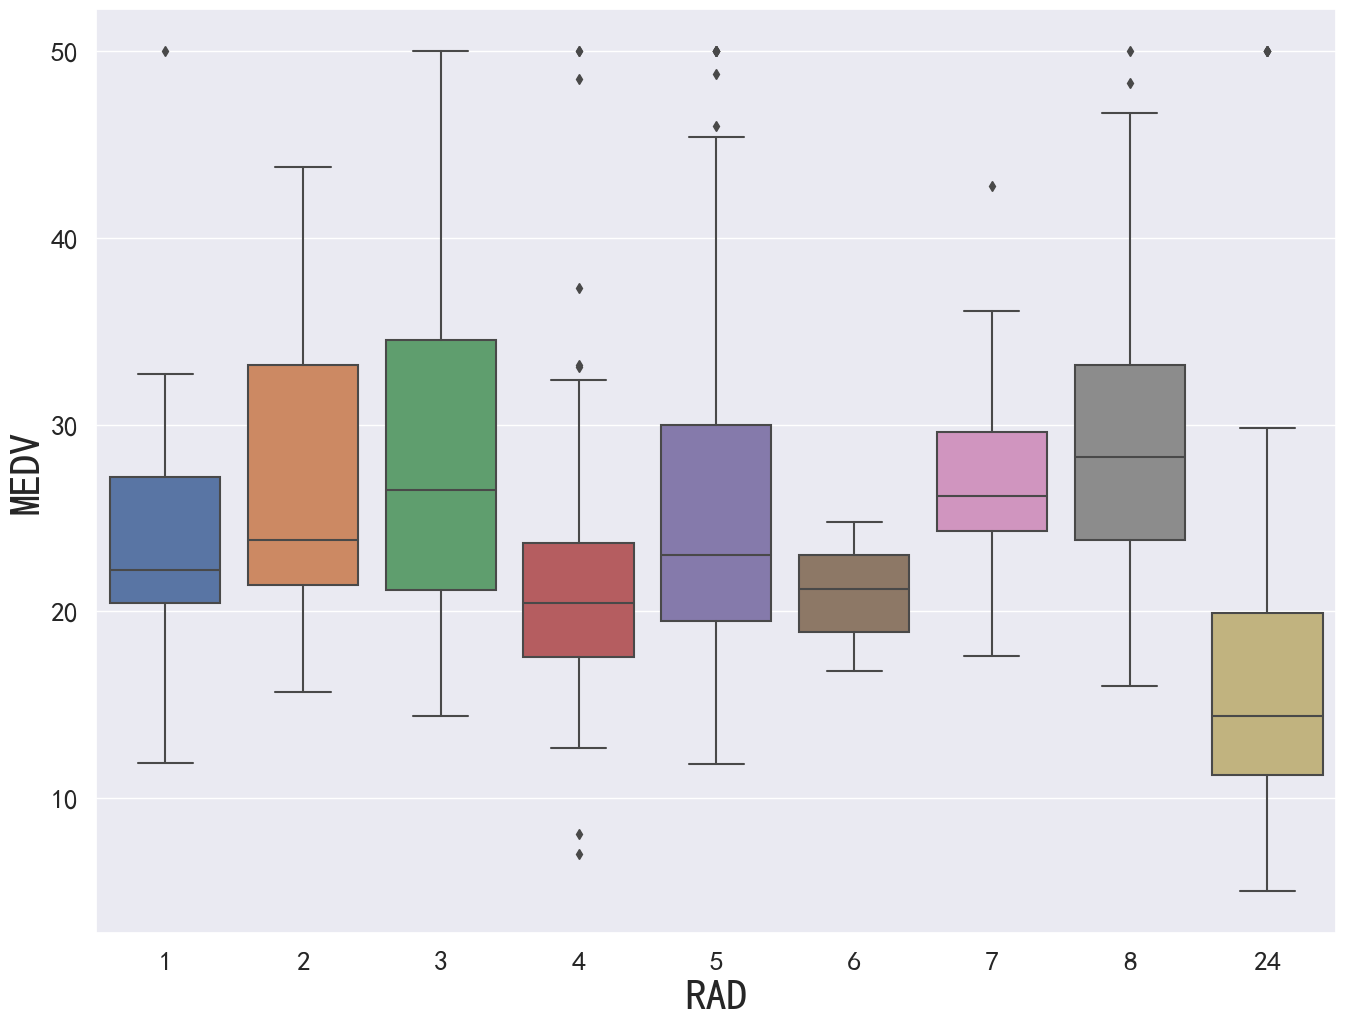

In [6]:
#查看‘RAD’与目标值的关系
plt.figure(figsize=(16, 12))
sns.boxplot(x='RAD', y='MEDV', data=df)
plt.xlabel('RAD', fontsize=30)
plt.ylabel('MEDV', fontsize=30)
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)


(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

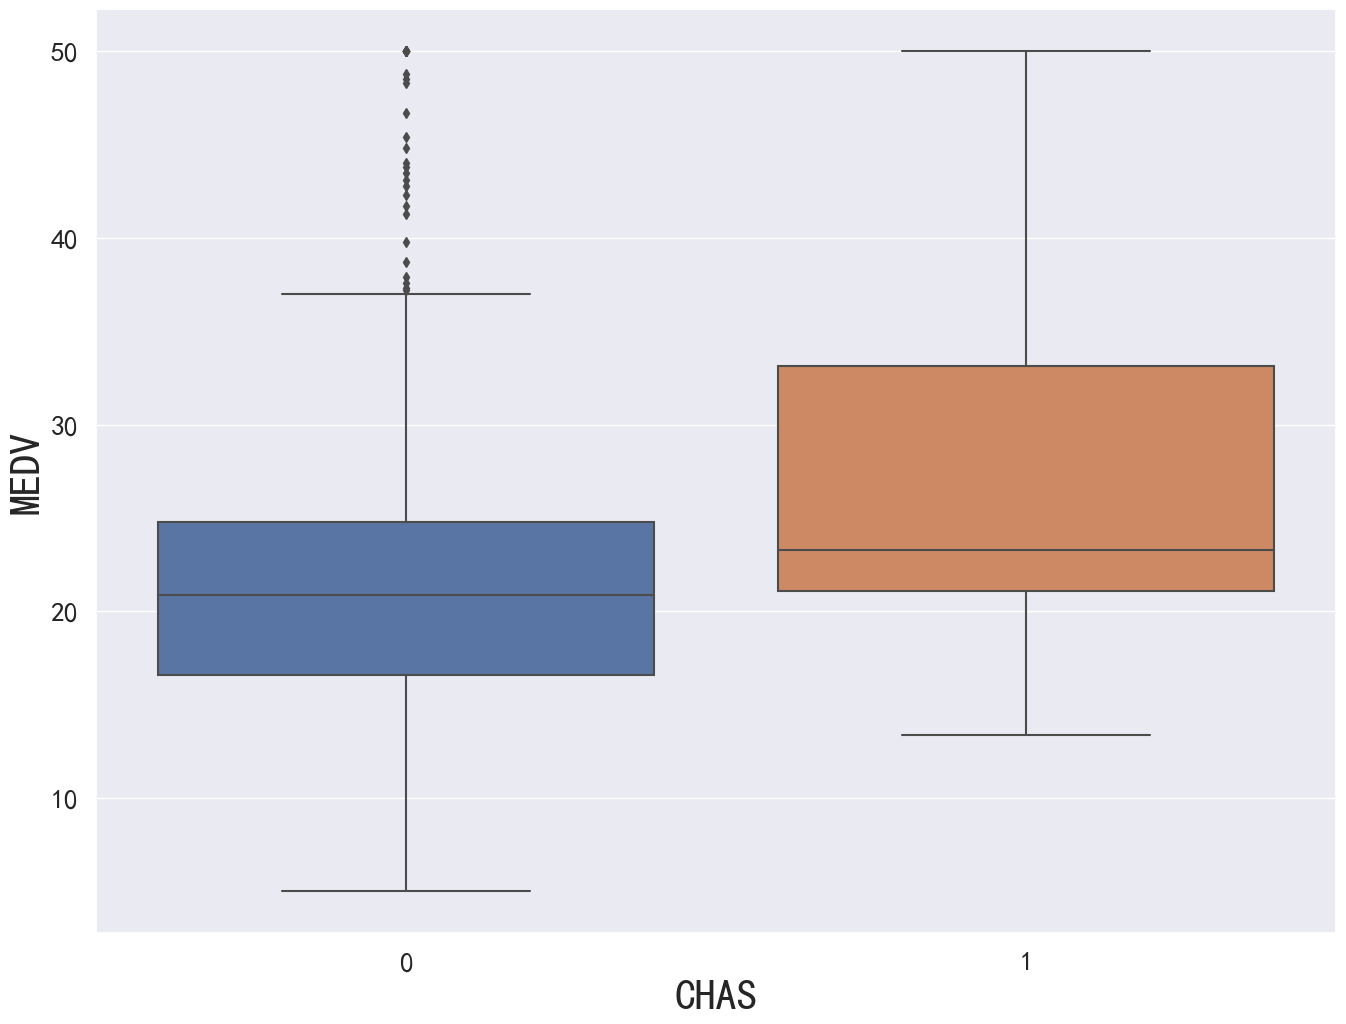

In [7]:

#查看‘CHAS’与目标值的关系
plt.figure(figsize=(16, 12))
sns.boxplot(x='CHAS', y='MEDV', data=df)
plt.xlabel('CHAS', fontsize=30)
plt.ylabel('MEDV', fontsize=30)
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)

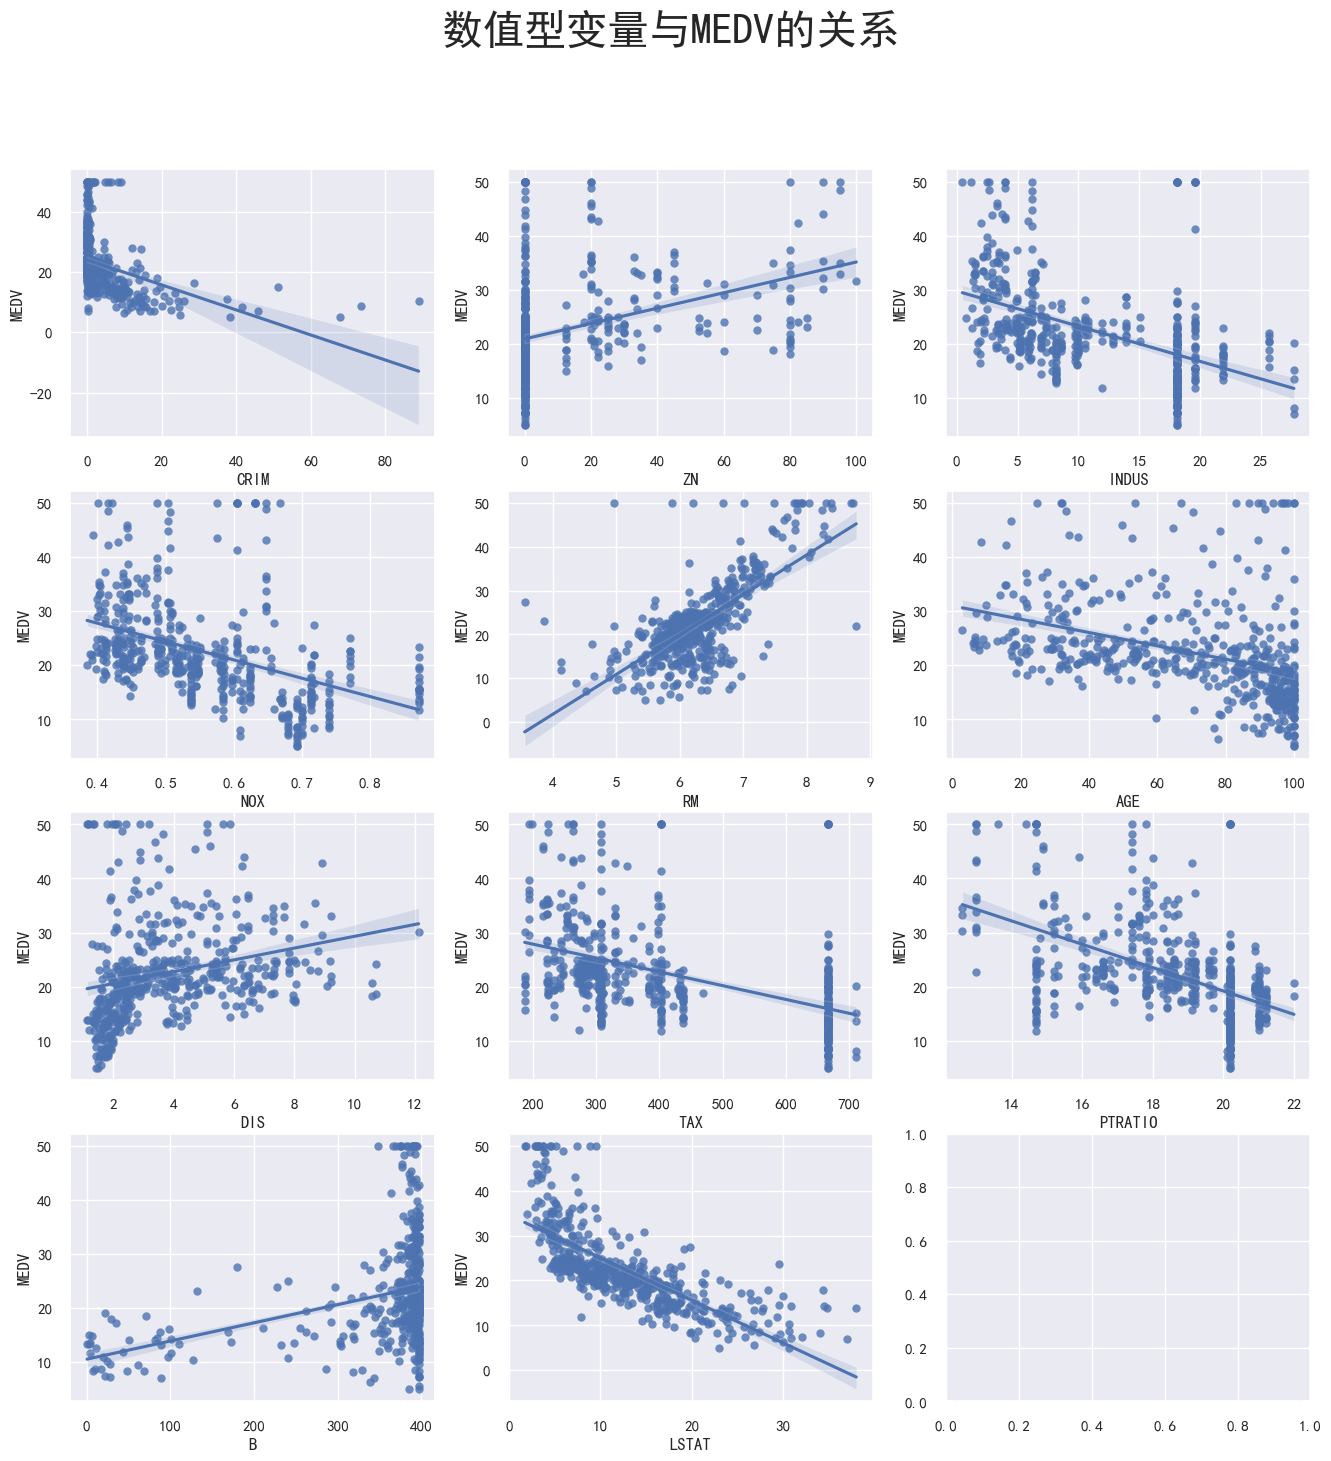

In [8]:
#每个数值型变量与MEDV的关系
fig, axs = plt.subplots(4,3,figsize=(16,16),)
fig.suptitle('数值型变量与MEDV的关系', size=30)
axs = axs.flatten()
for i, col in enumerate(numeric_columns[:-1]):
    sns.regplot(x = df[col],y = df['MEDV'], ax=axs[i]) 
    

In [9]:
'''
这里开始剔除变量
'''
#使用IQR法剔除变量
target_column = ['MEDV','CHAS','RAD']
df_1 =df.copy()
target = df_1[target_column]
features = df_1.drop(target_column, axis=1)
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1
features = features[~((features < (Q1 - 1.5 * IQR)) |(features > (Q3 + 1.5 * IQR))).any(axis=1)]
cleaned_feature_indices = features.index
df_1 = pd.concat([target.iloc[cleaned_feature_indices], features], axis=1)
df_1.reset_index(drop=True, inplace=True)
print("使用IQR删除之前: {}".format(df.shape[0]))
print("使用IQR删除之后: {}".format(df_1.shape[0]))


使用IQR删除之前: 506
使用IQR删除之后: 298


In [10]:
#使用Z-Score剔除变量
df_2 = df.copy()
target = df_2[target_column]
features = df_2.drop(target_column, axis=1)
z_scores = np.abs(stats.zscore(features))
features = features[(z_scores < 3).all(axis=1)]
cleaned_feature_indices = features.index
df_2 = pd.concat([target.iloc[cleaned_feature_indices], features], axis=1)
df_2.reset_index(drop=True, inplace=True)
print("使用Z-Score删除之前: {}".format(df.shape[0]))
print("使用Z-Score删除之后: {}".format(df_2.shape[0]))


使用Z-Score删除之前: 506
使用Z-Score删除之后: 448


In [11]:
#使用isolation forest 剔除变量
def remove_Outliters(by, data= df,):
    df_new = data.copy()
    target = df_new[target_column]
    features = df_new.drop(target_column, axis=1)
    method = by
    y_noano = method.fit_predict(features)
    cleaned_feature_indices = features.index[y_noano == 1]
    df_new = pd.concat([target.iloc[cleaned_feature_indices], features.iloc[cleaned_feature_indices]], axis=1)
    df_new.reset_index(drop=True, inplace=True)
    return df_new

df_3 =  remove_Outliters( by= IsolationForest(n_estimators=300, contamination=0.1, random_state=1) )   
print("使用isolation forest删除之前: {}".format(df.shape[0]))
print("使用isolation forest删除之后: {}".format(df_3.shape[0]))


使用isolation forest删除之前: 506
使用isolation forest删除之后: 455


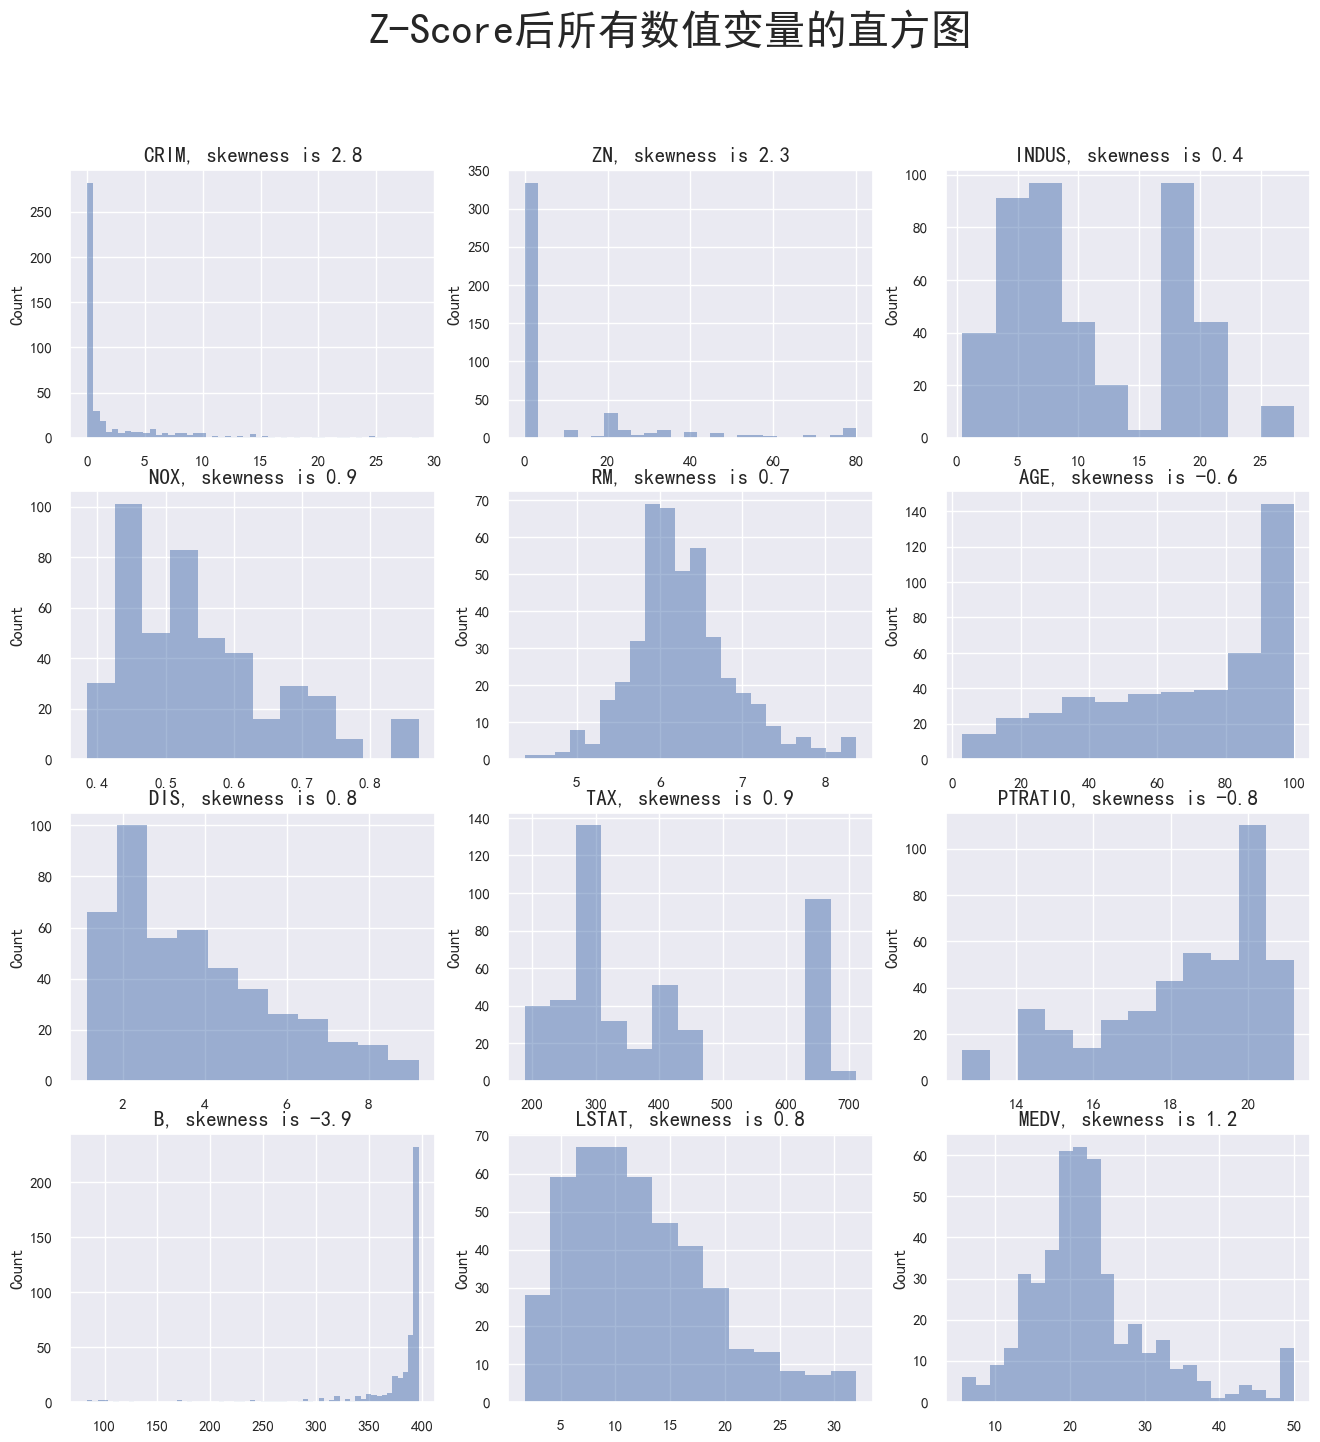

In [12]:
#Z-Score后所有数值变量的直方图
fig, axs = plt.subplots(4,3,figsize=(16,16),)
fig.suptitle('Z-Score后所有数值变量的直方图', size=30)
axs = axs.flatten()
for i, col in enumerate(numeric_columns):
    sns.histplot(df_2[col], ax=axs[i], fill=True,alpha=.5, linewidth=0) 
    axs[i].set_xlabel('')
    axs[i].set_title(col + ', skewness is '+str(round(df_2[col].skew(axis = 0, skipna = True),1)),size= 15)


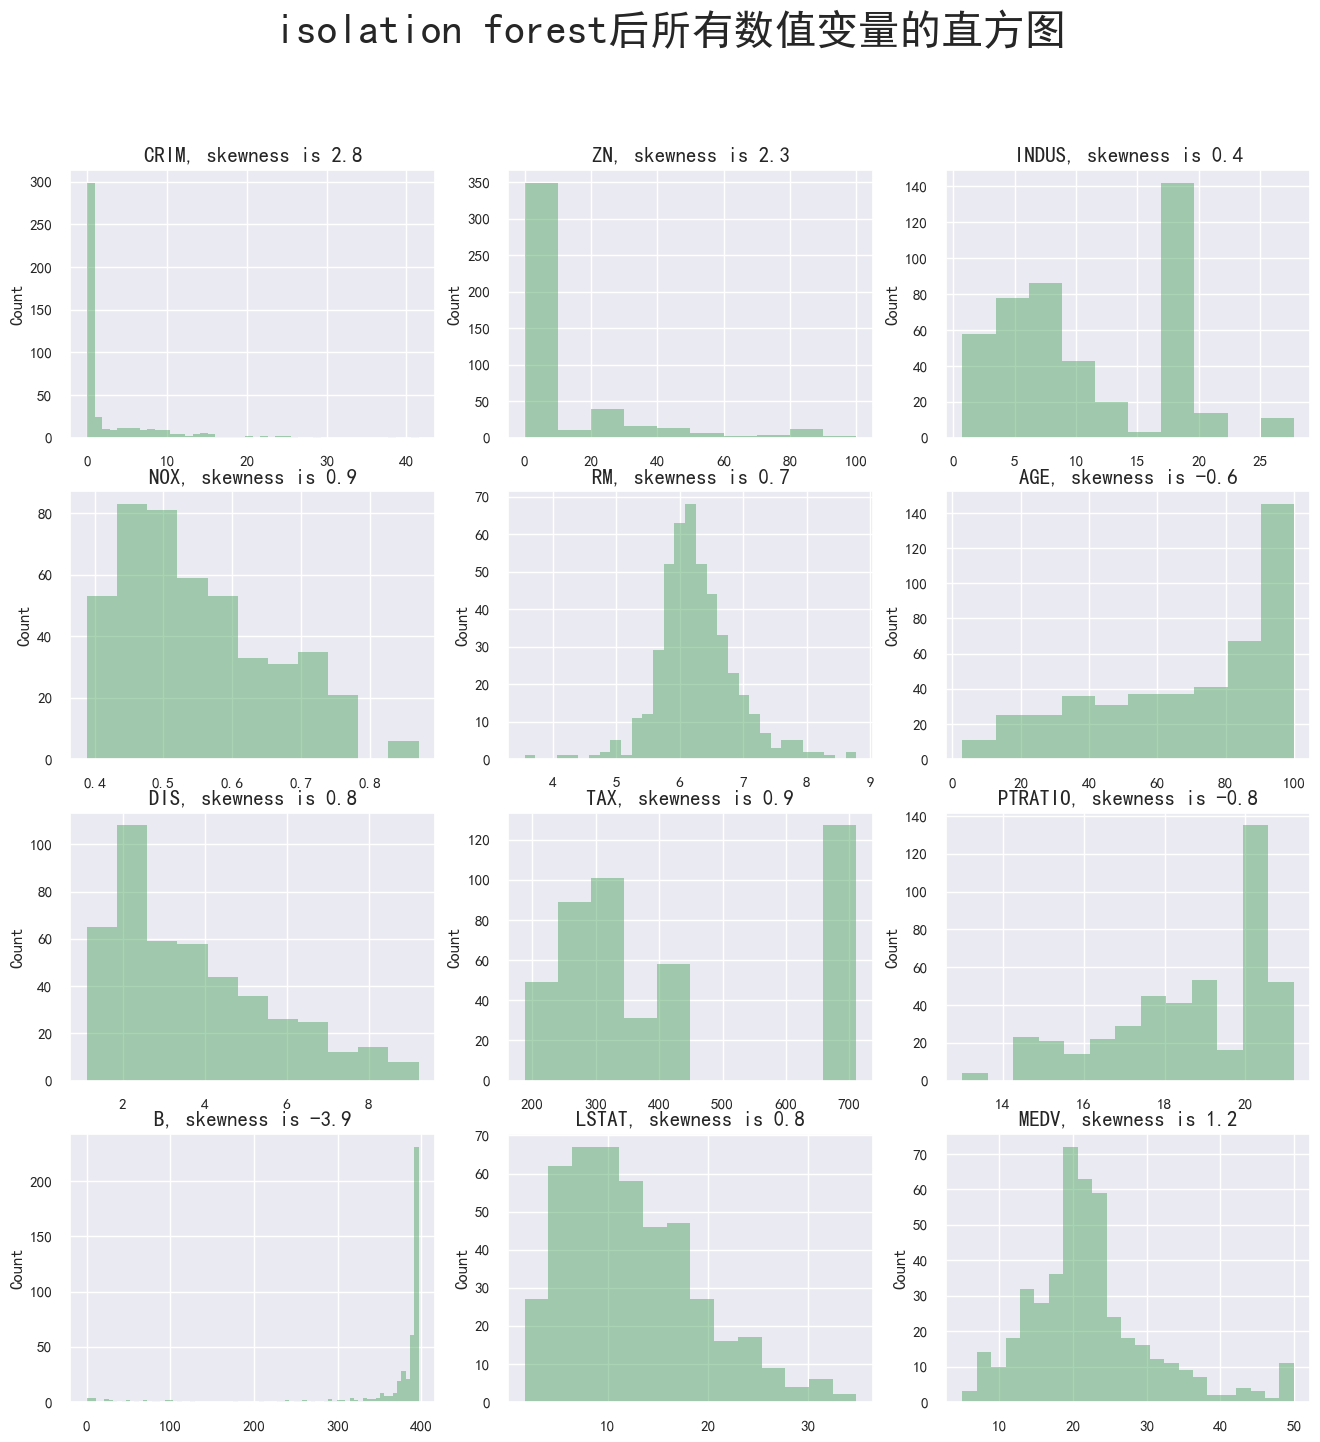

In [13]:
#isolation forest后所有数值变量的直方图
fig, axs = plt.subplots(4,3,figsize=(16,16),)
fig.suptitle('isolation forest后所有数值变量的直方图', size=30)
axs = axs.flatten()
for i, col in enumerate(numeric_columns):
    sns.histplot(df_3[col], ax=axs[i], fill=True,alpha=.5, linewidth=0,color='g') 
    axs[i].set_xlabel('')
    axs[i].set_title(col + ', skewness is '+str(round(df_2[col].skew(axis = 0, skipna = True),1)),size= 15)


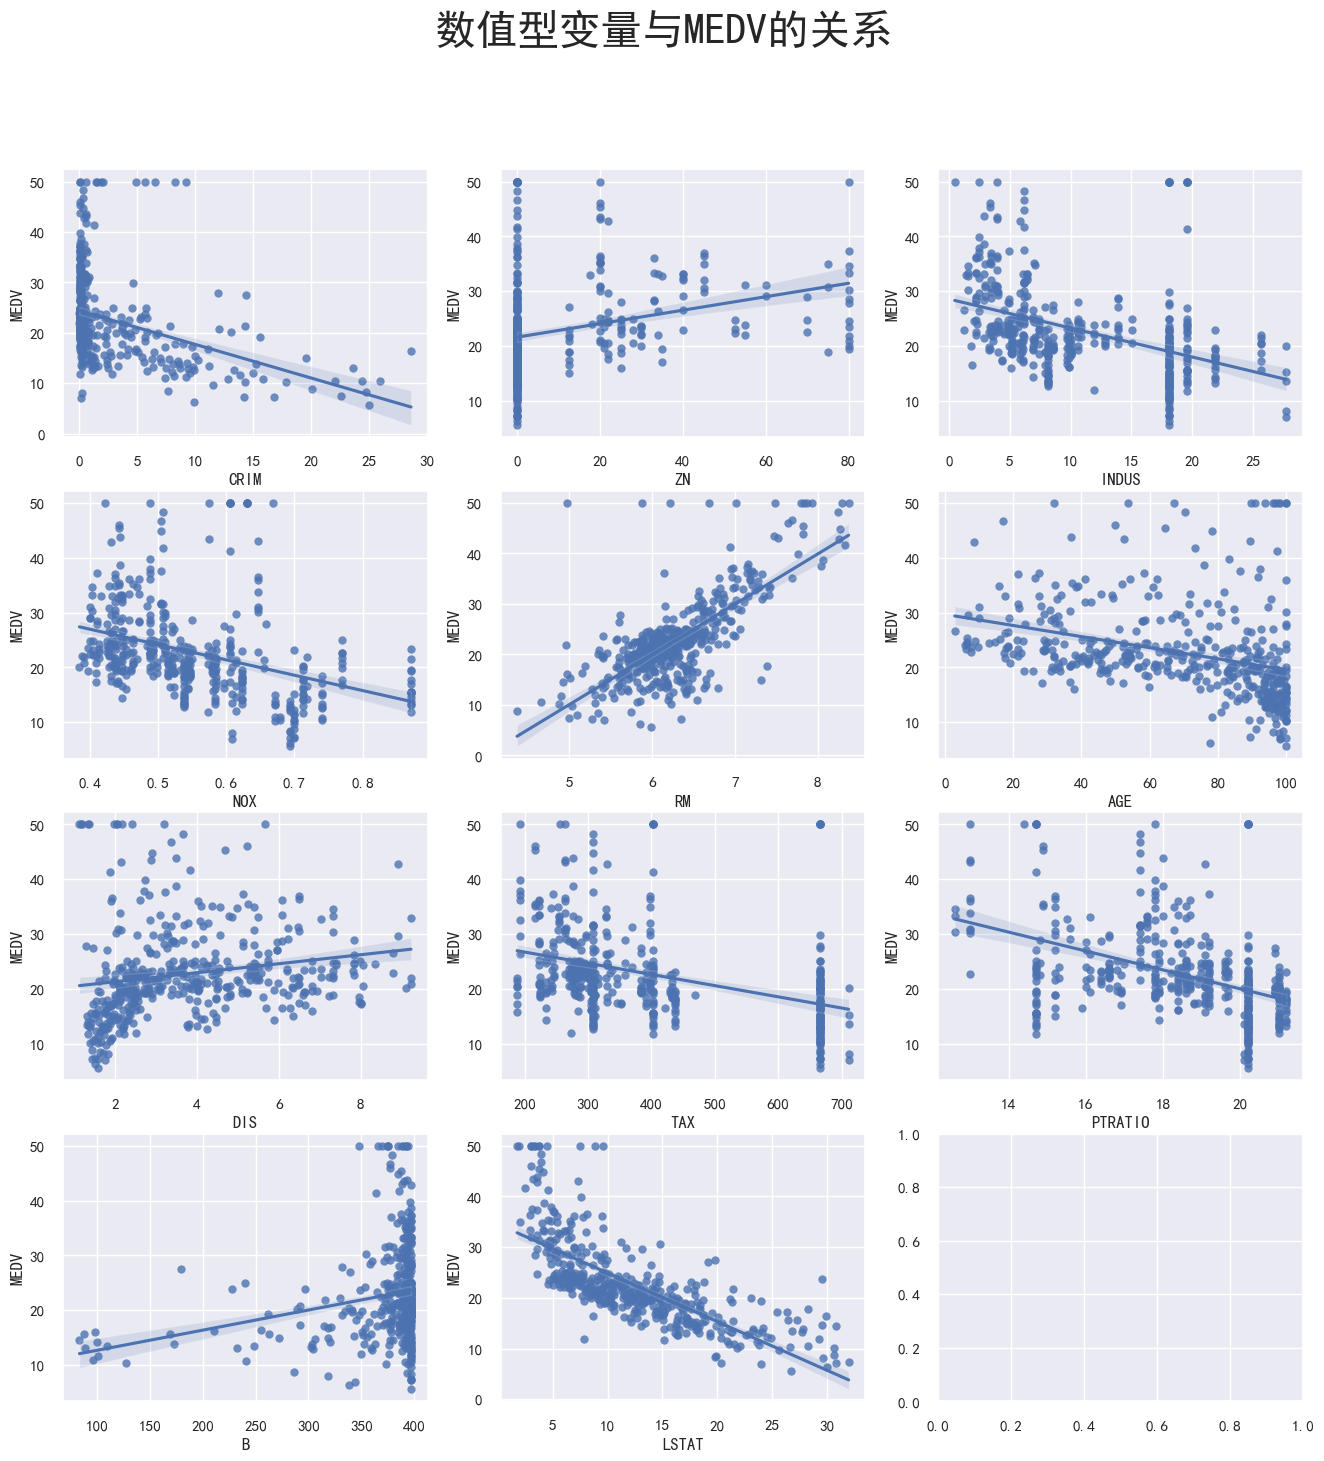

In [14]:
'''
在这里更换剔除异常值后的数据集
'''
df_final = df_2.copy()
#每个数值型变量与MEDV的关系，散点图
fig, axs = plt.subplots(4,3,figsize=(16,16),)
fig.suptitle('数值型变量与MEDV的关系', size=30)
axs = axs.flatten()
for i, col in enumerate(numeric_columns[:-1]):
    sns.regplot(x = df_final[col],y = df_final['MEDV'], ax=axs[i]) 

In [15]:
#把所有变量都转换成数值型
df_final=df_final.astype(float)

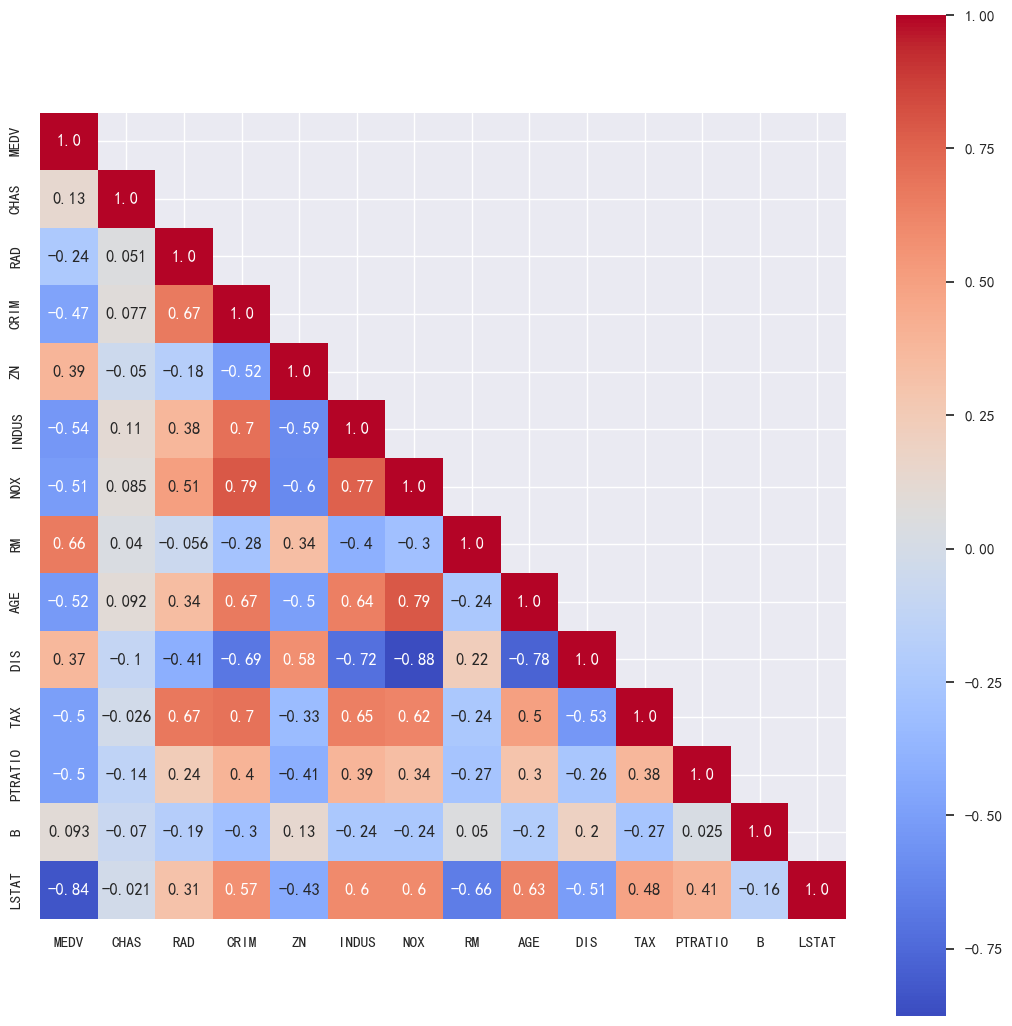

In [16]:

#相关矩阵
corr = df_final.corr(method='spearman')
mask = np.ones_like(corr)
mask = np.triu(mask,k=1)
plt.figure(figsize=(13,13))
sns.heatmap(corr, square= True, fmt='.2', annot=True, cmap='coolwarm',mask=mask);



In [17]:
df_final=df_final.drop('B', axis=1)

In [18]:

#划分测试集和训练集
X = df_final.drop('MEDV', axis=1)
y = df_final['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)


In [19]:
# 显示自变量和因变量的训练和测试集的形状
print(f"自变量训练集大小: {X_train.shape}")
print(f"因变量训练集大小: {y_train.shape}")
print(f"自变量测试集大小: {X_test.shape}")
print(f"因变量测试集大小: {y_test.shape}")


自变量训练集大小: (380, 12)
因变量训练集大小: (380,)
自变量测试集大小: (68, 12)
因变量测试集大小: (68,)


In [20]:

class BenchmarkRegressor:
    def __init__(self):
        pass

    def fit(self, X, y, **kwargs):
        self.mean = y.mean()

    def predict(self, X):
        return [self.mean] * len(X)

最优参数以及最高得分: [125.           0.83507935]


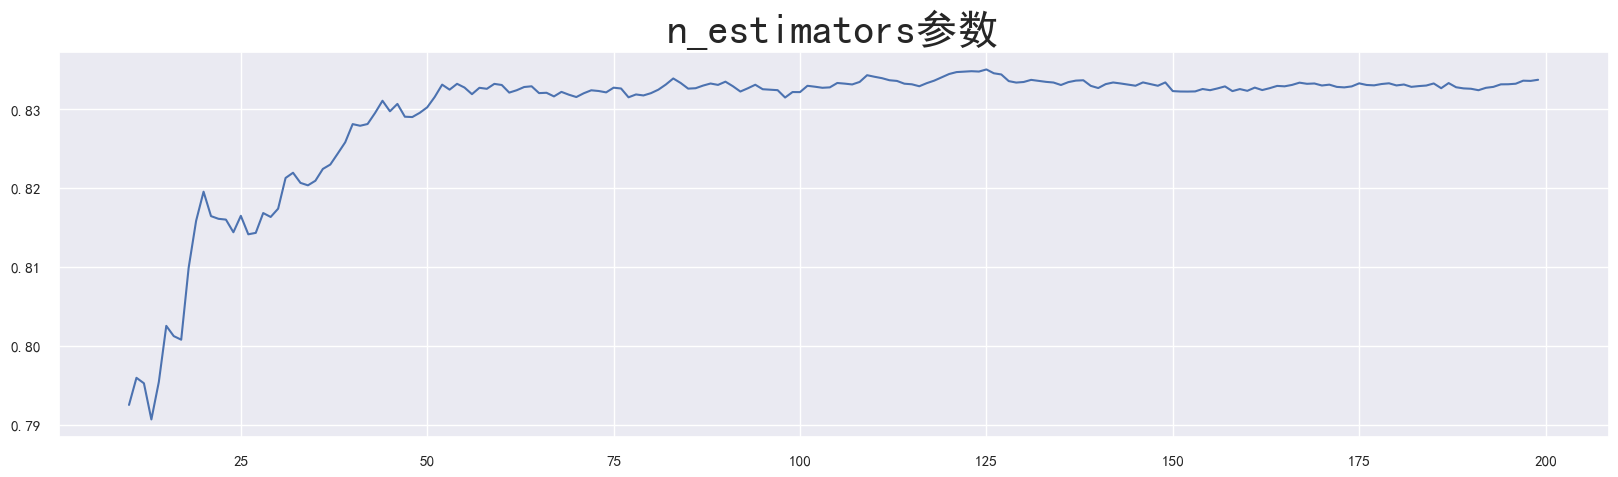

In [21]:
#随机森林模型
###调n_estimators参数  
ScoreAll = []  
for i in range(10,200,1):   
	DT = RandomForestRegressor(n_estimators = i,random_state = 11)
	score = cross_val_score(DT,X_train,y_train,cv=5,scoring='r2').mean()  
	ScoreAll.append([i,score])  
ScoreAll = np.array(ScoreAll)  
	  
max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引  
print("最优参数以及最高得分:",ScoreAll[max_score])    
plt.figure(figsize=[20,5])  
plt.plot(ScoreAll[:,0],ScoreAll[:,1])  
plt.title('n_estimators参数', size=30)
plt.show()  

最优参数以及最高得分: [13.          0.83545889]


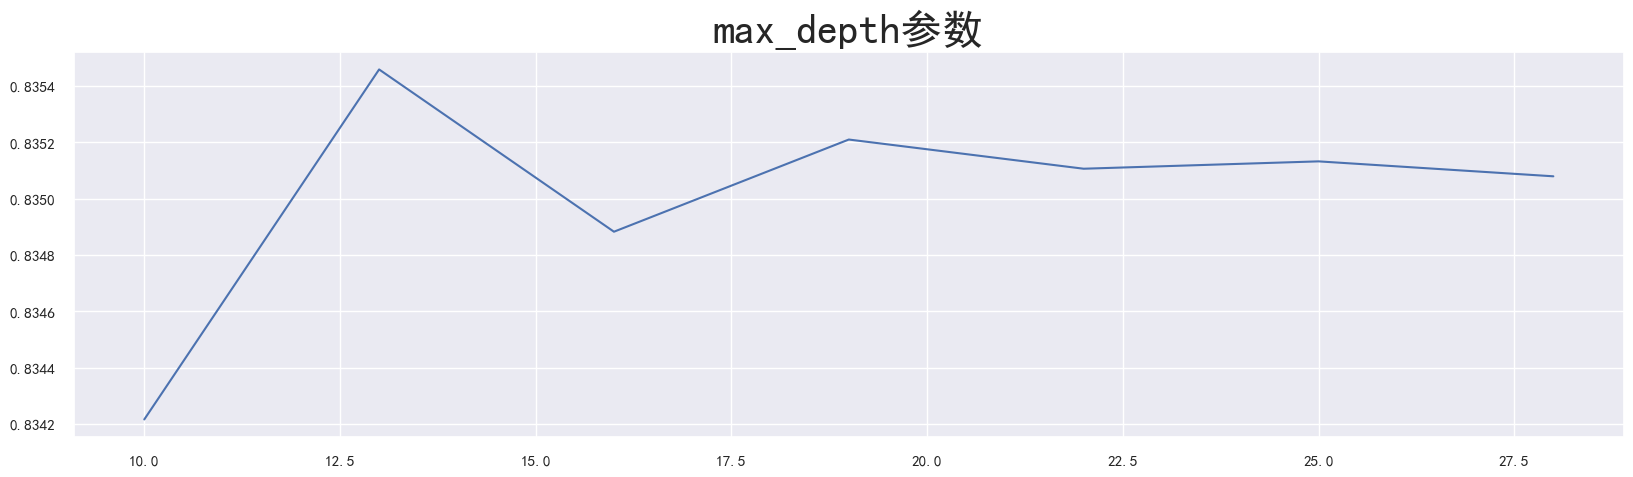

In [22]:

#探索max_depth的最佳参数
ScoreAll = []  
for i in range(10,30,3):  
	DT = RandomForestRegressor(n_estimators = 125,random_state = 11,max_depth =i ) 
	score = cross_val_score(DT,X_train,y_train,cv=5,scoring='r2').mean()  
	ScoreAll.append([i,score])  
ScoreAll = np.array(ScoreAll)  
	  
max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] 
print("最优参数以及最高得分:",ScoreAll[max_score])    
plt.figure(figsize=[20,5])  
plt.title('max_depth参数', size=30)
plt.plot(ScoreAll[:,0],ScoreAll[:,1])  
plt.show()  

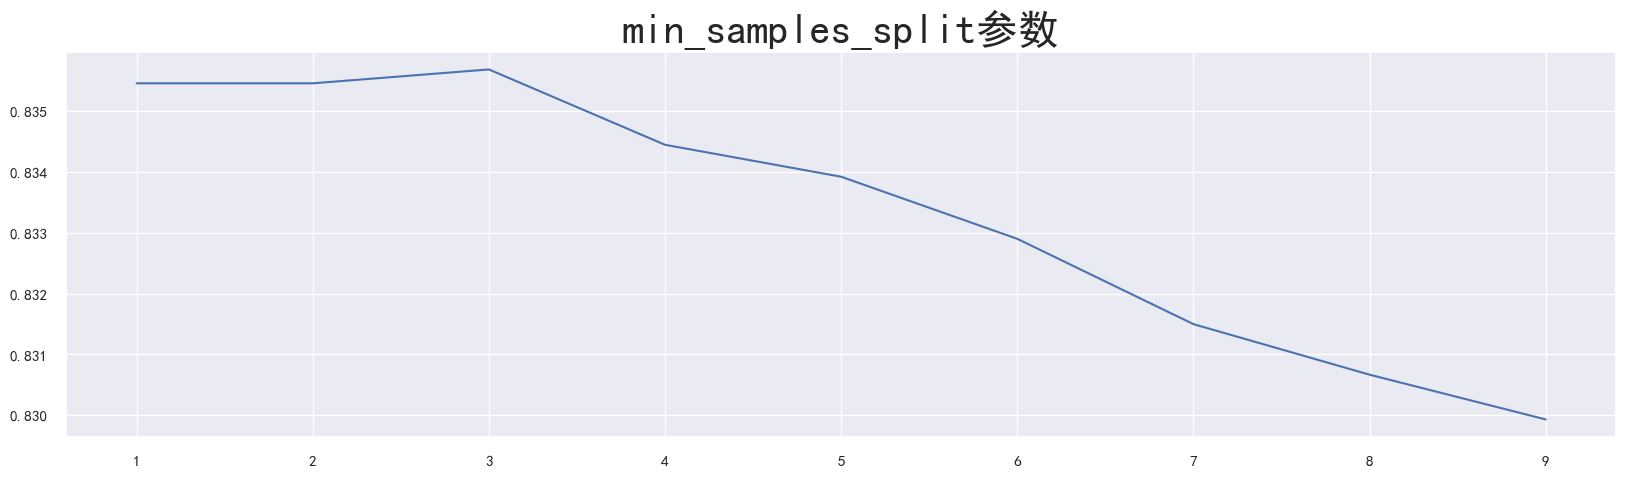

In [23]:
#min_samples_split的最佳参数
ScoreAll = []  
for i in range(1,10,1):  
	DT = RandomForestRegressor(n_estimators = 125,random_state = 11,max_depth =13,min_samples_split = i ) #,criterion = 'entropy'  
	score = cross_val_score(DT,X_train,y_train,cv=5,scoring='r2').mean()  
	ScoreAll.append([i,score])  
ScoreAll = np.array(ScoreAll)  
plt.figure(figsize=[20,5])  
plt.title('min_samples_split参数', size=30)
plt.plot(ScoreAll[:,0],ScoreAll[:,1])  
plt.show()  

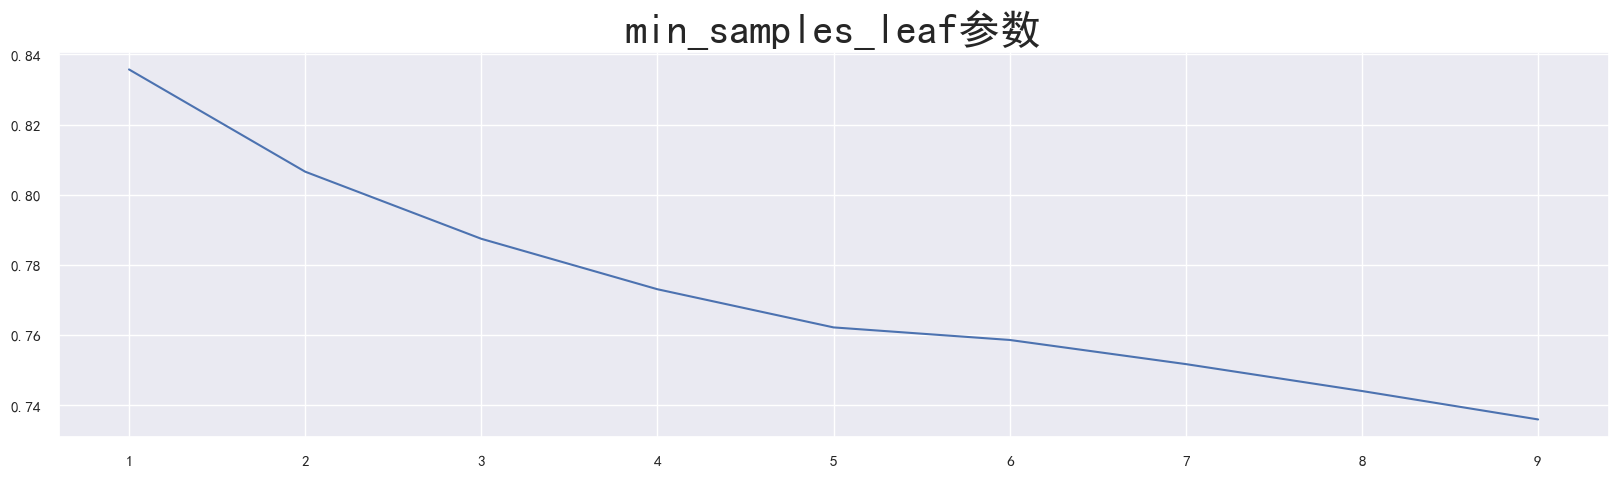

In [24]:
#min_samples_leaf最佳参数
ScoreAll = []  
for i in range(1,10,1):  
	DT = RandomForestRegressor(n_estimators = 125,random_state = 11,max_depth =13,min_samples_leaf = i,min_samples_split = 3,) #,criterion = 'entropy'  
	score = cross_val_score(DT,X_train,y_train,cv=5,scoring='r2').mean()  
	ScoreAll.append([i,score])  
ScoreAll = np.array(ScoreAll)  
plt.figure(figsize=[20,5])  
plt.title('min_samples_leaf参数', size=30)
plt.plot(ScoreAll[:,0],ScoreAll[:,1])  
plt.show()  

In [25]:
#max_features调参
param_grid = {  
	'max_features':np.arange(0.1, 1)}  
rfc = RandomForestRegressor(random_state=11,n_estimators = 125,max_depth = 13,min_samples_leaf =1 ,min_samples_split =3)  
GS = GridSearchCV(rfc,param_grid,cv=10)  
GS.fit(X_train,y_train)  
print(GS.best_params_)  
print(GS.best_score_)  

{'max_features': 0.1}
0.779509088581823


In [26]:
#小范围修改
param_grid = {  
	'max_features':np.arange(0.1, 1),  
	'min_samples_leaf':np.arange(1,15),  
	'min_samples_split':np.arange(1,10),   }  
rfc = RandomForestRegressor(random_state=11,n_estimators = 125,max_depth = 13 )  
GS = GridSearchCV(rfc,param_grid,cv=5,scoring='r2')  
GS.fit(X_train,y_train)  
print(GS.best_params_)  
print(GS.best_score_)  


{'max_features': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 1}
0.7801907212300279


In [27]:
#在得到的最优参数附近进行小范围网格搜索
import time  
start = time.time()  
param_grid = {  
  'n_estimators':np.arange(120, 130),  
  'max_depth':np.arange(10, 16),  
  'min_samples_leaf':np.arange(1, 8),  
  'min_samples_split':np.arange(1, 5),  
   'max_features':np.arange(0.1, 1)  
}  
	  
rfc = RandomForestRegressor(random_state=11)  
GS = GridSearchCV(rfc,param_grid,cv=5,scoring='r2')  
GS.fit(X_train,y_train)  
end = time.time()  
print("循环运行时间:%.2f秒"%(end-start))  
print(GS.best_params_)  
print(GS.best_score_)   

循环运行时间:1516.82秒
{'max_depth': 14, 'max_features': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 128}
0.7888015687794494


In [28]:
#随机森林模型
rf_reg = RandomForestRegressor(random_state=11,n_estimators = 128,max_depth = 14,
                               min_samples_leaf =1 ,min_samples_split =1,max_features=0.1)
rf_reg.fit(X_train, y_train)
y_train_pred_rf = rf_reg.predict(X_train)
y_pred_rf = rf_reg.predict(X_test)

r2_rf_traing = r2_score(y_train, y_train_pred_rf)
r2_rf  =r2_score(y_test, y_pred_rf)

mse_rf_traing = mean_squared_error(y_train, y_train_pred_rf)
mse_rf  =mean_squared_error(y_test, y_pred_rf)

print(f"随机森林训练集R^2: {r2_rf_traing:0.4f}")
print(f"随机森林测试集R^2 : {r2_rf:0.4f}")
print(f"随机森林训练集MSE : {mse_rf_traing:0.4f}")
print(f"随机森林测试集MSE : {mse_rf:0.4f}")

随机森林训练集R^2: 0.9749
随机森林测试集R^2 : 0.8179
随机森林训练集MSE : 1.7176
随机森林测试集MSE : 16.0335


In [29]:
# 获取特征重要性
feature_importance = rf_reg.feature_importances_
feature_importance_sorted = sorted(zip(feature_importance, X_train.columns), reverse=True)
for importance, variable in feature_importance_sorted:
    print(f"{variable}: {importance:.4f}")

LSTAT: 0.2010
RM: 0.1749
DIS: 0.1126
NOX: 0.0866
CRIM: 0.0791
AGE: 0.0774
INDUS: 0.0654
PTRATIO: 0.0610
TAX: 0.0562
RAD: 0.0366
ZN: 0.0335
CHAS: 0.0158


最优参数以及最高得分: [109.           0.84249457]


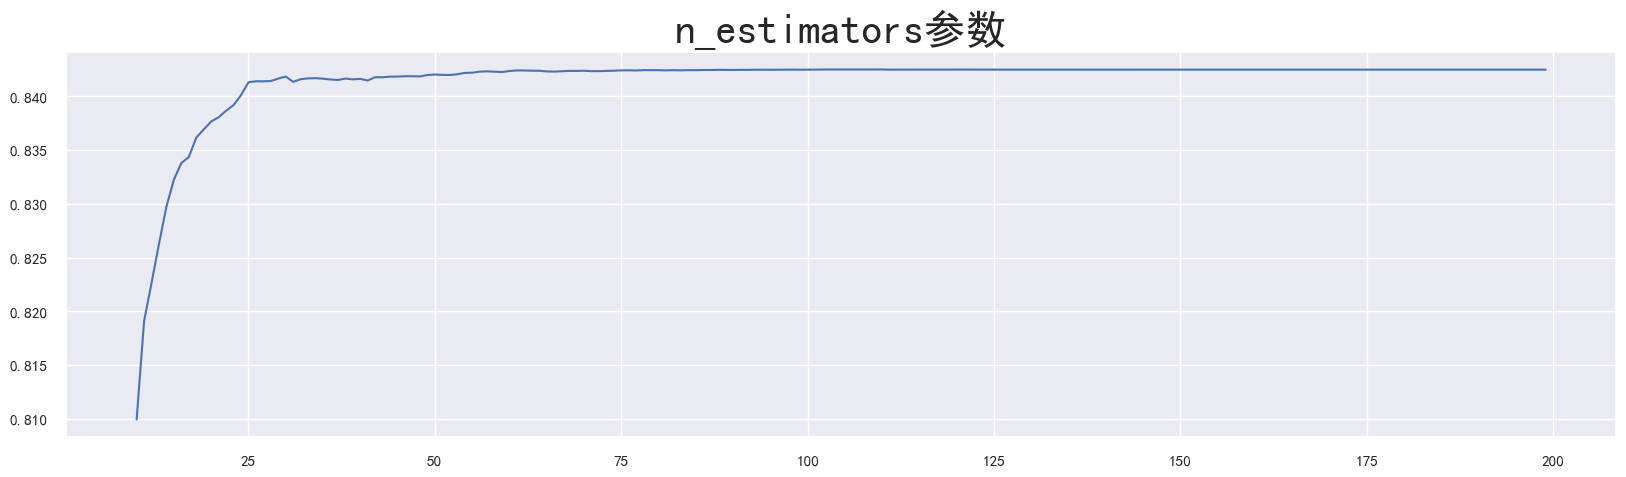

In [30]:
#xgboost
###调n_estimators参数  
ScoreAll1= []  
model=XGBRegressor()
for i in range(10,200,1):
    DT=XGBRegressor(n_estimators=i,random_state=11)
    score=cross_val_score(DT,X_train,y_train,cv=5,scoring='r2').mean()
    ScoreAll1.append([i,score])
ScoreAll1=np.array(ScoreAll1)
max_score = np.where(ScoreAll1==np.max(ScoreAll1[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引  
print("最优参数以及最高得分:",ScoreAll1[max_score])    
plt.figure(figsize=[20,5])
plt.title('n_estimators参数', size=30)  
plt.plot(ScoreAll1[:,0],ScoreAll1[:,1])  
plt.show()  

最优参数以及最高得分: [0.7       0.8530211]


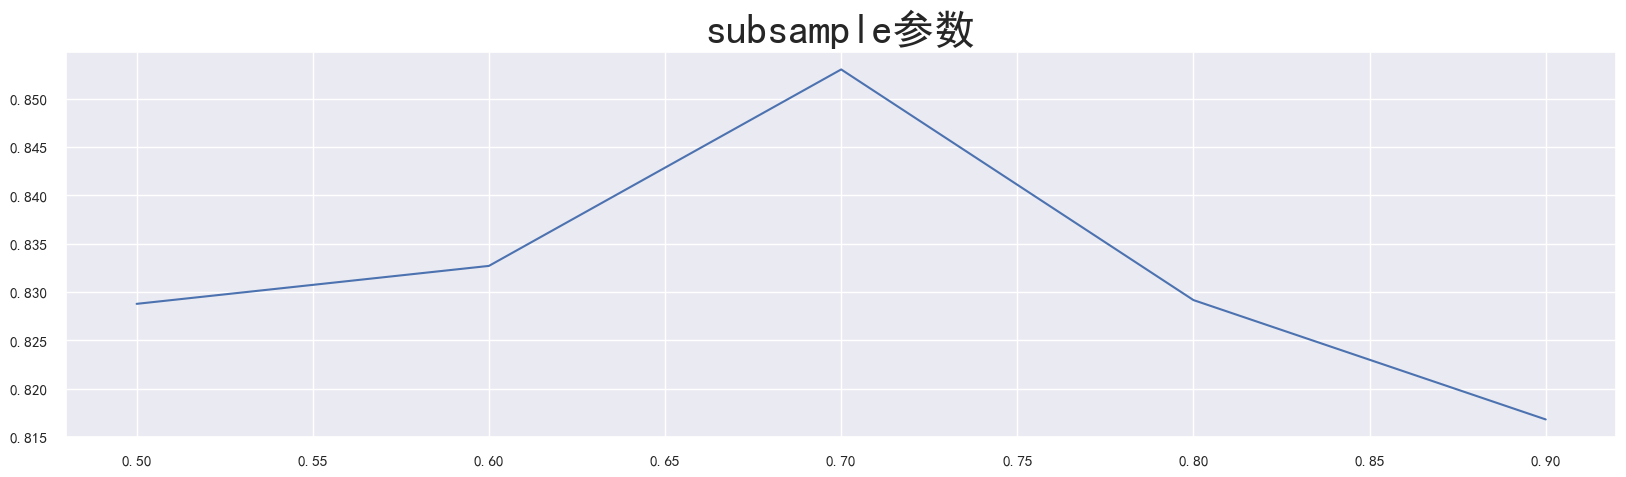

In [31]:
#xgboost
###调subsample参数  
ScoreAll1= []  
model=XGBRegressor()
for i in np.arange(0.5,1,0.1):
    DT=XGBRegressor(n_estimators=109,random_state=11,subsample=i)
    score=cross_val_score(DT,X_train,y_train,cv=5,scoring='r2').mean()
    ScoreAll1.append([i,score])
ScoreAll1=np.array(ScoreAll1)
max_score = np.where(ScoreAll1==np.max(ScoreAll1[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引  
print("最优参数以及最高得分:",ScoreAll1[max_score])    
plt.figure(figsize=[20,5])
plt.title('subsample参数', size=30)  
plt.plot(ScoreAll1[:,0],ScoreAll1[:,1])  
plt.show()  

最优参数以及最高得分: [3.         0.85787093]


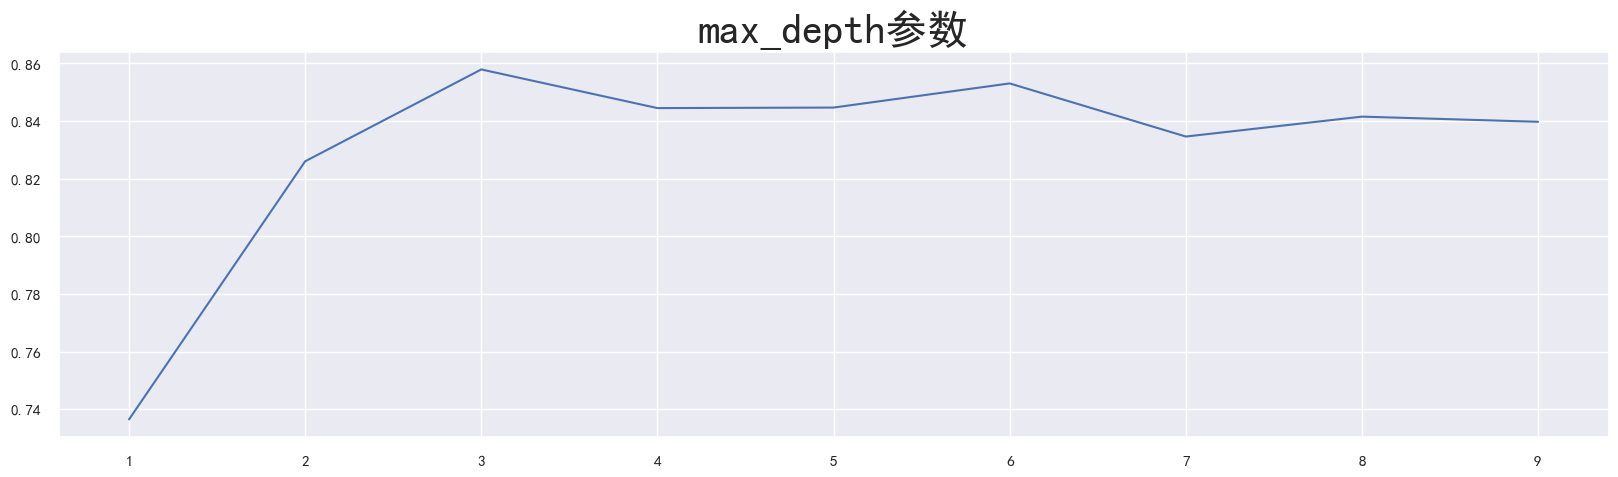

In [32]:
#xgboost
###调max_depth参数  
ScoreAll1= []  
model=XGBRegressor()
for i in range(1,10,1):
    DT=XGBRegressor(n_estimators=109,random_state=11,subsample=0.7,max_depth=i)
    score=cross_val_score(DT,X_train,y_train,cv=5,scoring='r2').mean()
    ScoreAll1.append([i,score])
ScoreAll1=np.array(ScoreAll1)
max_score = np.where(ScoreAll1==np.max(ScoreAll1[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引  
print("最优参数以及最高得分:",ScoreAll1[max_score])    
plt.figure(figsize=[20,5])
plt.title('max_depth参数', size=30)  
plt.plot(ScoreAll1[:,0],ScoreAll1[:,1])  
plt.show()  

最优参数以及最高得分: [0.26       0.85241232]


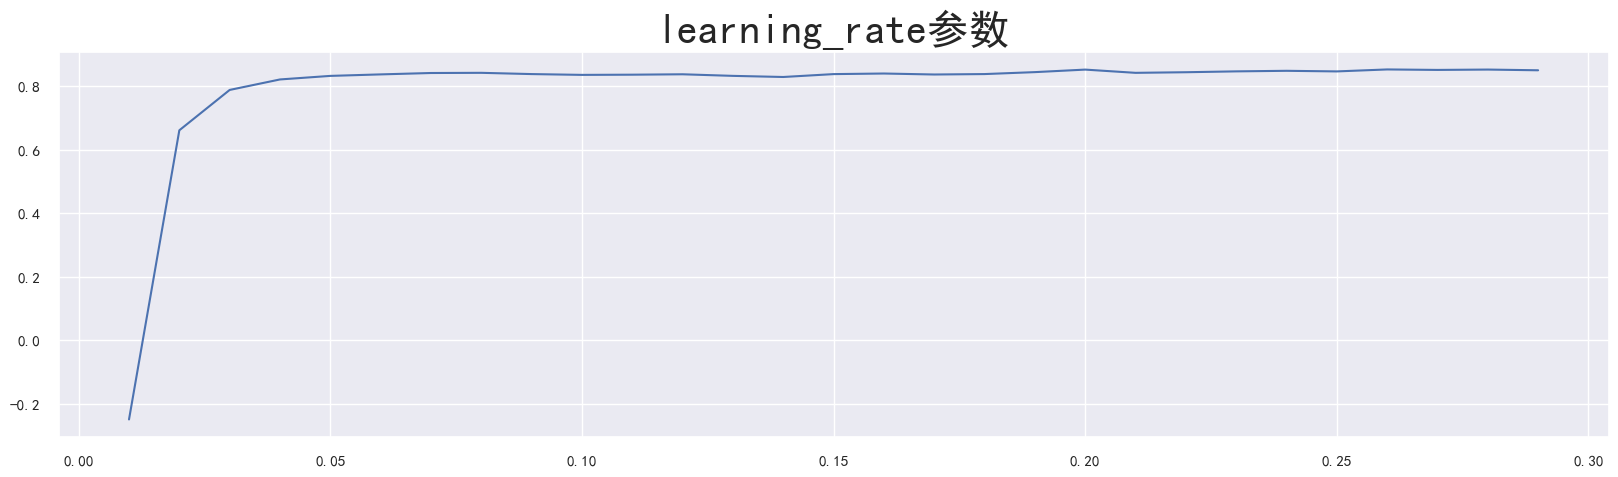

In [33]:
#xgboost
###调learning_rate参数  
ScoreAll1= []  
model=XGBRegressor()
for i in np.arange(0.01,0.3,0.01):
    DT=XGBRegressor(n_estimators=109,random_state=11,subsample=0.7,max_depth=3,learning_rate=i)
    score=cross_val_score(DT,X_train,y_train,cv=5,scoring='r2').mean()
    ScoreAll1.append([i,score])
ScoreAll1=np.array(ScoreAll1)
max_score = np.where(ScoreAll1==np.max(ScoreAll1[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引  
print("最优参数以及最高得分:",ScoreAll1[max_score])    
plt.figure(figsize=[20,5])
plt.title('learning_rate参数', size=30)  
plt.plot(ScoreAll1[:,0],ScoreAll1[:,1])  
plt.show()  

In [34]:
xgb_reg = XGBRegressor(n_estimators=109,random_state=11,subsample=0.7,max_depth=3,learning_rate=0.26)
xgb_reg.fit(X_train, y_train)
y_train_pred_xgb = xgb_reg.predict(X_train)
y_pred_xgb = xgb_reg.predict(X_test)

r2_xgb_traing = r2_score(y_train, y_train_pred_xgb)
r2_xgb  =r2_score(y_test, y_pred_xgb)

mse_xgb_traing = mean_squared_error(y_train, y_train_pred_xgb)
mse_xgb  =mean_squared_error(y_test, y_pred_xgb)

print(f"R^2 Training set for XGBoost is: {r2_xgb_traing:0.4f}")
print(f"R^2 testing set for XGBoost is: {r2_xgb:0.4f}")
print(f"MSE Training set for XGBoost is: {mse_xgb_traing:0.4f}")
print(f"MSE testing set for XGBoost is: {mse_xgb:0.4f}")

R^2 Training set for XGBoost is: 0.9931
R^2 testing set for XGBoost is: 0.9090
MSE Training set for XGBoost is: 0.4707
MSE testing set for XGBoost is: 8.0111


In [35]:
# 获取特征重要性
feature_importance = xgb_reg .feature_importances_
feature_importance_sorted = sorted(zip(feature_importance, X_train.columns), reverse=True)
for importance, variable in feature_importance_sorted:
    print(f"{variable}: {importance:.4f}")

LSTAT: 0.3078
RM: 0.2380
NOX: 0.0859
PTRATIO: 0.0791
DIS: 0.0733
TAX: 0.0683
CRIM: 0.0355
AGE: 0.0287
RAD: 0.0281
CHAS: 0.0260
ZN: 0.0171
INDUS: 0.0122


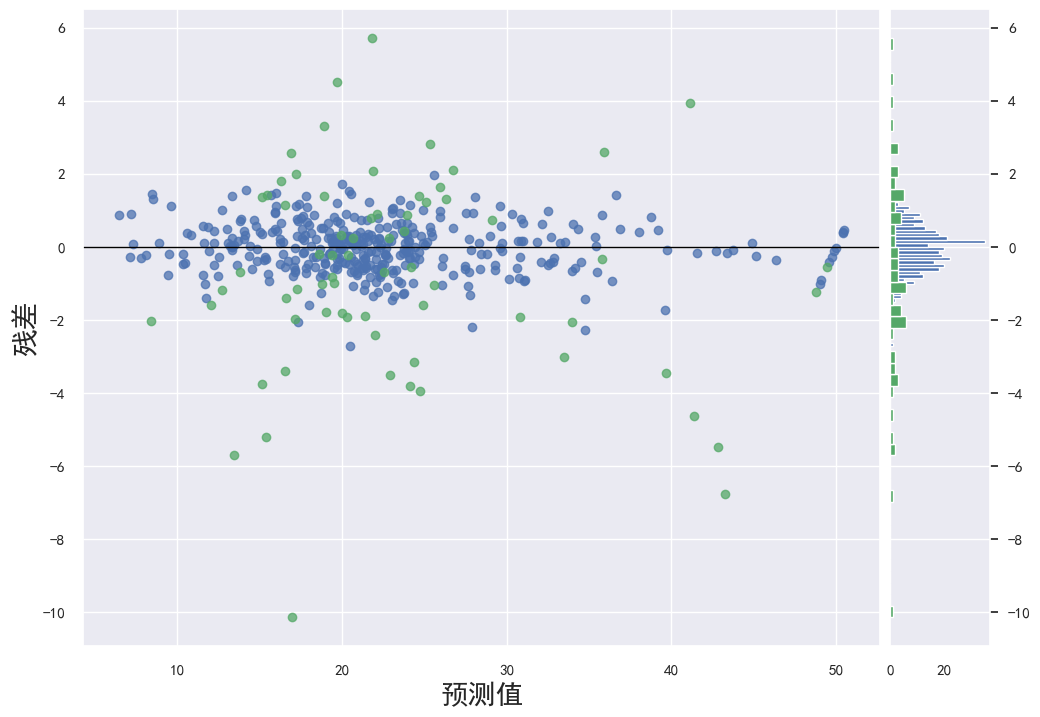

In [41]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(xgb_reg)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

ax = visualizer.ax
ax.axhline(0, color='black', linestyle='-', linewidth=1)
ax.set_xlabel("预测值",size=20)
ax.set_ylabel("残差",size=20)

plt.show()